# Plot submissions per month versus time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
date = '2019-12-18'

In [3]:
df = pd.read_csv('submissions_with_date_{}.csv'.format(date), index_col='last_updated',
                 usecols=['collaboration', 'last_updated'], parse_dates=True)

Drop all rows with collaboration of `IPPP Durham`.

In [4]:
df[df.collaboration == 'IPPP Durham'].size

59

In [5]:
df = df[df.collaboration != 'IPPP Durham']

Drop all rows with zero microseconds, because these are mostly records migrated from the old site.

In [6]:
df = df[df.index.microsecond != 0]

First group by year.

In [7]:
df.groupby(by=df.index.year).count()

,collaboration
last_updated,
2016,1
2017,125
2018,171
2019,199


Then also by month.

In [8]:
df.index = df.index.strftime('%Y-%m')

In [9]:
df.head()

,collaboration
2017-01,ALICE
2017-03,ALICE
2017-03,ALICE
2017-04,ALICE
2017-04,ALICE


In [10]:
df_count = df.groupby(by=df.index).count()

Rename column names.

In [11]:
df_count = df_count.rename(columns={'collaboration': 'Number of papers'})

In [12]:
df_count.index.names = ['Month']

In [13]:
df_count.head()

,Number of papers
Month,
2016-12,1
2017-01,7
2017-02,7
2017-03,13
2017-04,18


In [14]:
df_count.tail()

,Number of papers
Month,
2019-08,20
2019-09,12
2019-10,21
2019-11,12
2019-12,16


Drop the first and last month since likely to be incomplete.

In [15]:
df_count = df_count[1:-1]

In [16]:
df_count.head()

,Number of papers
Month,
2017-01,7
2017-02,7
2017-03,13
2017-04,18
2017-05,7


In [17]:
df_count.tail()

,Number of papers
Month,
2019-07,15
2019-08,20
2019-09,12
2019-10,21
2019-11,12


Make a bar plot of 'Number of papers' against 'Month' with a linear fit overlaid.

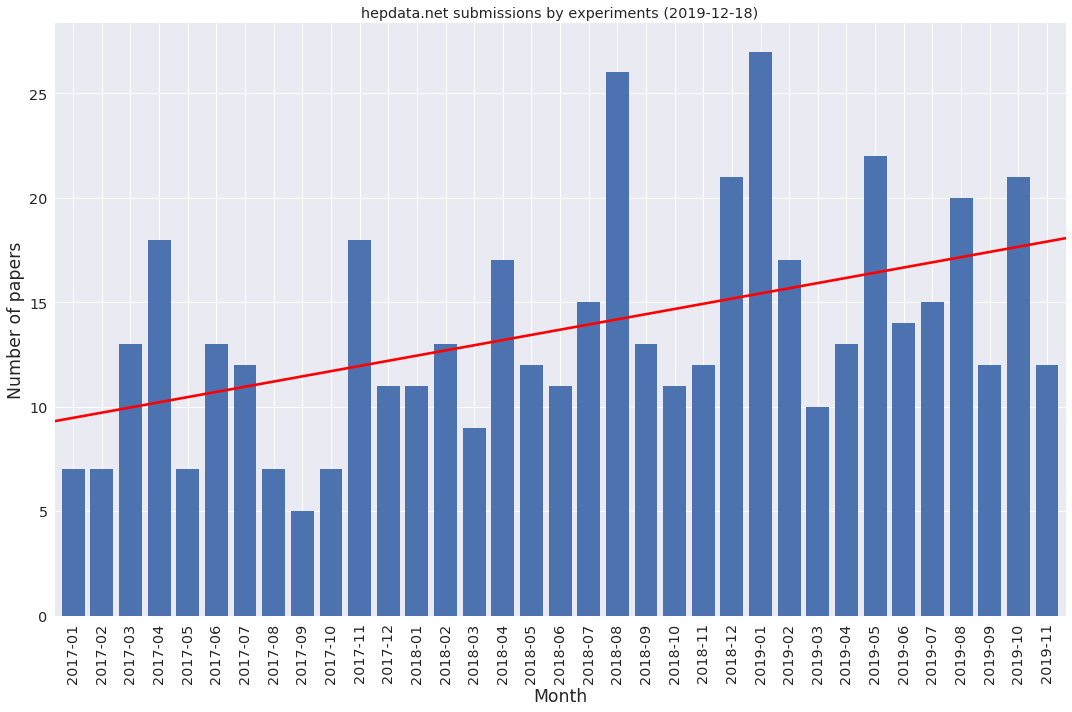

In [18]:
# Bar plot of 'Number of papers' against 'Month'.
df_count.plot(x=df_count.index, y='Number of papers', kind='bar', width=0.8,
              figsize=(15,10), legend=False, fontsize='x-large')

# Add a red line with a linear regression fit.
sns.regplot(x=np.arange(df_count.shape[0]), y='Number of papers', data=df_count,
            scatter=False, ci=None, color='red')

plt.title('hepdata.net submissions by experiments ({})'.format(date), fontsize='x-large')
plt.xlabel('Month', fontsize='xx-large')
plt.ylabel('Number of papers', fontsize='xx-large')
plt.tight_layout()
plt.savefig('submissions_with_date_{}.png'.format(date))
plt.show()